In [1]:
import pandas as pd
import camelot
pd.set_option('display.float_format', lambda x: '%.2f' % x)
import pandas as pd
import matplotlib.pyplot as plt
from pywaffle import Waffle

## Consumption of rice in 2021 (USDA)

In [2]:
tables = camelot.read_pdf('USDA_grain.pdf', flavor='stream', pages='25')
tables

<TableList n=1>

In [3]:
df1 = tables[0].df
df1

,0,1,2,3,4,5,6
0,,,"World Rice Production, Consumption, and Stocks",,,,
1,,,"Local Marketing Years, Thousand Metric Tons",,,,
2,,2017/18,2018/19,2019/20,2020/21,2021/22,2021/22
3,,,,,,Nov,Dec
4,,,,,,,none
5,Milled Production,,,,,,
6,Bangladesh,"32,650","34,909","35,850","34,600","36,250","35,500"
7,Brazil,"8,204","7,140","7,602","8,001","8,024","8,024"
8,Burma,"13,200","13,200","12,650","12,600","12,600","12,600"
9,Cambodia,"5,554","5,742","5,740","5,783","5,900","5,900"


In [4]:
df1[27:36]

,0,1,2,3,4,5,6
27,Bangladesh,"35,200","35,400","35,700","36,100","36,700","36,700"
28,Brazil,"7,650","7,350","7,300","7,450","7,450","7,450"
29,Burma,"10,200","10,250","10,400","10,550","10,700","10,650"
30,Cambodia,"4,200","4,300","4,350","4,400","4,500","4,500"
31,China,"142,509","142,920","145,230","150,578","154,900","154,890"
32,Egypt,"4,200","4,200","4,300","4,300","4,250","4,250"
33,India,"98,669","99,160","101,950","100,005","103,500","103,500"
34,Indonesia,"37,000","36,300","36,000","35,800","35,600","35,600"
35,Japan,"8,600","8,400","8,350","8,250","8,200","8,200"


In [5]:
headers = ['country', "year1", "year2", "year3", "year4", "year5", 'year6']

In [6]:
df1.columns = headers

In [7]:
comsumption = df1[27:36]
comsumption

,country,year1,year2,year3,year4,year5,year6
27,Bangladesh,"35,200","35,400","35,700","36,100","36,700","36,700"
28,Brazil,"7,650","7,350","7,300","7,450","7,450","7,450"
29,Burma,"10,200","10,250","10,400","10,550","10,700","10,650"
30,Cambodia,"4,200","4,300","4,350","4,400","4,500","4,500"
31,China,"142,509","142,920","145,230","150,578","154,900","154,890"
32,Egypt,"4,200","4,200","4,300","4,300","4,250","4,250"
33,India,"98,669","99,160","101,950","100,005","103,500","103,500"
34,Indonesia,"37,000","36,300","36,000","35,800","35,600","35,600"
35,Japan,"8,600","8,400","8,350","8,250","8,200","8,200"


In [8]:
comsumption.to_csv('comsumption2021.csv', index=False)

In [9]:
comsumption = pd.read_csv('comsumption2021.csv', usecols=['country', "year6"])
comsumption

,country,year6
0,Bangladesh,"36,700"
1,Brazil,"7,450"
2,Burma,"10,650"
3,Cambodia,"4,500"
4,China,"154,890"
5,Egypt,"4,250"
6,India,"103,500"
7,Indonesia,"35,600"
8,Japan,"8,200"


In [10]:
comsumption.columns = comsumption.columns.str.replace('year6', "2021")

In [11]:
comsumption.to_csv('rice_comsumption_2021.csv', index=False)

## Production of rice in 2021 (FAOUN)

FAOSTAT is all primary crop production data from all countries in the world for 11 years.

In [12]:
df = pd.read_csv("FAOSTAT.csv")
df

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,QCL,Crops and livestock products,4,Afghanistan,5510,Production,01371,"Almonds, in shell",2011,2011,tonnes,60611.00,A,Official figure
1,QCL,Crops and livestock products,4,Afghanistan,5510,Production,01371,"Almonds, in shell",2012,2012,tonnes,62000.00,A,Official figure
2,QCL,Crops and livestock products,4,Afghanistan,5510,Production,01371,"Almonds, in shell",2013,2013,tonnes,42215.00,A,Official figure
3,QCL,Crops and livestock products,4,Afghanistan,5510,Production,01371,"Almonds, in shell",2014,2014,tonnes,27400.00,A,Official figure
4,QCL,Crops and livestock products,4,Afghanistan,5510,Production,01371,"Almonds, in shell",2015,2015,tonnes,24246.00,A,Official figure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124849,QCL,Crops and livestock products,716,Zimbabwe,5510,Production,0111,Wheat,2020,2020,tonnes,212530.00,A,Official figure
124850,QCL,Crops and livestock products,716,Zimbabwe,5510,Production,0111,Wheat,2021,2021,tonnes,337212.00,A,Official figure
124851,QCL,Crops and livestock products,716,Zimbabwe,5510,Production,24212.02,Wine,2011,2011,tonnes,1750.00,E,Estimated value
124852,QCL,Crops and livestock products,716,Zimbabwe,5510,Production,24212.02,Wine,2012,2012,tonnes,1750.00,E,Estimated value


#### Filter for year 2021

In [13]:
year_2021 = df[df.Year == 2021]
year_2021

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description
10,QCL,Crops and livestock products,4,Afghanistan,5510,Production,01371,"Almonds, in shell",2021,2021,tonnes,40655.23,I,Imputed value
21,QCL,Crops and livestock products,4,Afghanistan,5510,Production,01654,"Anise, badian, coriander, cumin, caraway, fenn...",2021,2021,tonnes,19398.07,E,Estimated value
32,QCL,Crops and livestock products,4,Afghanistan,5510,Production,01341,Apples,2021,2021,tonnes,292586.58,I,Imputed value
43,QCL,Crops and livestock products,4,Afghanistan,5510,Production,01343,Apricots,2021,2021,tonnes,113659.69,I,Imputed value
54,QCL,Crops and livestock products,4,Afghanistan,5510,Production,0115,Barley,2021,2021,tonnes,122692.77,I,Imputed value
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124806,QCL,Crops and livestock products,716,Zimbabwe,5510,Production,01620,Tea leaves,2021,2021,tonnes,65384.53,I,Imputed value
124817,QCL,Crops and livestock products,716,Zimbabwe,5510,Production,01234,Tomatoes,2021,2021,tonnes,25300.98,E,Estimated value
124828,QCL,Crops and livestock products,716,Zimbabwe,5510,Production,01970,Unmanufactured tobacco,2021,2021,tonnes,162370.00,A,Official figure
124839,QCL,Crops and livestock products,716,Zimbabwe,5510,Production,01658,"Vanilla, raw",2021,2021,tonnes,9.65,E,Estimated value


#### Filter for rice all data of 2021

In [14]:
rice_2021 = year_2021[year_2021.Item == 'Rice']
rice_2021

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description
384,QCL,Crops and livestock products,4,Afghanistan,5510,Production,0113,Rice,2021,2021,tonnes,458571.64,I,Imputed value
1095,QCL,Crops and livestock products,8,Albania,5510,Production,0113,Rice,2021,2021,tonnes,0.00,M,"Missing value (data cannot exist, not applicable)"
1932,QCL,Crops and livestock products,12,Algeria,5510,Production,0113,Rice,2021,2021,tonnes,314.29,E,Estimated value
2425,QCL,Crops and livestock products,24,Angola,5510,Production,0113,Rice,2021,2021,tonnes,10514.00,A,Official figure
3641,QCL,Crops and livestock products,32,Argentina,5510,Production,0113,Rice,2021,2021,tonnes,1453187.00,A,Official figure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120851,QCL,Crops and livestock products,860,Uzbekistan,5510,Production,0113,Rice,2021,2021,tonnes,334226.00,A,Official figure
121781,QCL,Crops and livestock products,862,Venezuela (Bolivarian Republic of),5510,Production,0113,Rice,2021,2021,tonnes,788422.50,I,Imputed value
122503,QCL,Crops and livestock products,704,Viet Nam,5510,Production,0113,Rice,2021,2021,tonnes,43852728.69,A,Official figure
123758,QCL,Crops and livestock products,894,Zambia,5510,Production,0113,Rice,2021,2021,tonnes,65875.83,A,Official figure


### Due to time crunch, made manual checks for each required country and merged that data manually to the final df used for making the graphic.

In [15]:
rice_2021[rice_2021.Area == "China, mainland"]

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description
22897,QCL,Crops and livestock products,156,"China, mainland",5510,Production,0113,Rice,2021,2021,tonnes,212843000.00,A,Official figure


In [16]:
rice_2021[rice_2021.Area == "India"]

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description
51400,QCL,Crops and livestock products,356,India,5510,Production,0113,Rice,2021,2021,tonnes,195425000.00,A,Official figure


In [17]:
rice_2021[rice_2021.Area == "Indonesia"]

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description
52303,QCL,Crops and livestock products,360,Indonesia,5510,Production,0113,Rice,2021,2021,tonnes,54415294.00,A,Official figure


## Combinig consumption and production data

In [18]:
consump_df = pd.read_csv('comsumption2021.csv', usecols=['country', 'year6'])
consump_df

,country,year6
0,Bangladesh,"36,700"
1,Brazil,"7,450"
2,Burma,"10,650"
3,Cambodia,"4,500"
4,China,"154,890"
5,Egypt,"4,250"
6,India,"103,500"
7,Indonesia,"35,600"
8,Japan,"8,200"


Dropped data for earlier years and used last column (Dec 2021 consumption) only

In [19]:
consump_df = consump_df.drop(labels=[0, 1, 2, 3, 5, 8])

Manually added column from production

In [20]:
consump_df['product'] = [0, 0, 0]

In [21]:
consump_df = consump_df.reset_index(drop=True)
consump_df

,country,year6,product
0,China,"154,890",0
1,India,"103,500",0
2,Indonesia,"35,600",0


In [22]:
consump_df['product'][0] = 212843000.00

/var/folders/6g/mf4qklbs63q07skjqqfkj5lw0000gn/T/ipykernel_20667/3797615093.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  consump_df['product'][0] = 212843000.00


In [23]:
consump_df['product'][1] = 195425000.00

/var/folders/6g/mf4qklbs63q07skjqqfkj5lw0000gn/T/ipykernel_20667/2770296547.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  consump_df['product'][1] = 195425000.00


In [24]:
consump_df['product'][2] = 54415294.00

/var/folders/6g/mf4qklbs63q07skjqqfkj5lw0000gn/T/ipykernel_20667/1100123744.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  consump_df['product'][2] = 54415294.00


* Realised USDA data is in thousand metric ton
* Cleaned the data first for commas and dtypes
* 1000 metric ton = 1102.31 US ton
* 1 metric ton = 1.10231 US ton
* converted the data from thousand metric ton to metric ton (multiply by 1000)

In [25]:
consump_df.year6 = consump_df.year6.str.replace(",", "")

In [26]:
consump_df.year6 = consump_df.year6.astype(int)

In [27]:
consump_df.year6 = consump_df.year6 * 1000

In [28]:
consump_df.columns = consump_df.columns.str.replace('year6', "consumption") #This is still in metric ton

In [29]:
consump_df

,country,consumption,product
0,China,154890000,212843000
1,India,103500000,195425000
2,Indonesia,35600000,54415294


In [30]:
consump_df.consumption = consump_df.consumption * 1.10231 #converted to US ton

In [31]:
consump_df.consumption = consump_df.consumption.round(2)

In [32]:
consump_df['product'] = consump_df['product'].round(2)

In [33]:
data = consump_df.transpose()
data

,0,1,2
country,China,India,Indonesia
consumption,170736795.90,114089085.00,39242236.00
product,212843000,195425000,54415294


In [34]:
headers = data.iloc[0]

In [35]:
data = data[1:]
data

,0,1,2
consumption,170736795.90,114089085.00,39242236.00
product,212843000,195425000,54415294


In [36]:
data.columns = headers

In [37]:
data

country,China,India,Indonesia
consumption,170736795.90,114089085.00,39242236.00
product,212843000,195425000,54415294


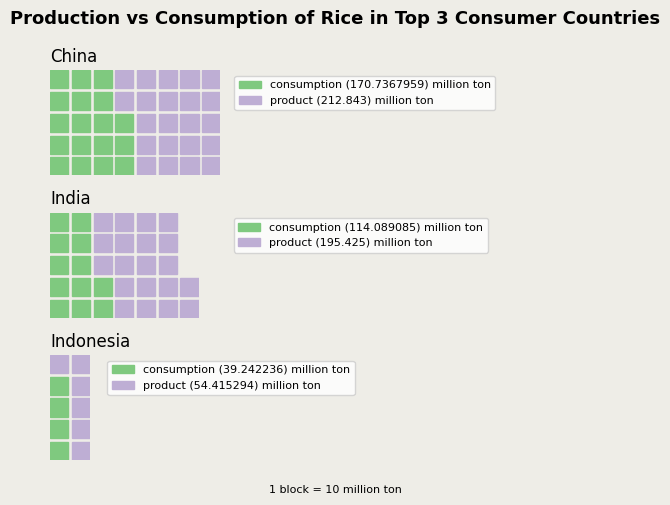

In [41]:
fig = plt.figure(
    FigureClass=Waffle,
    plots={
        311: {
            'values': data['China'] / 10000000,  # Convert actual number to a reasonable block number
            'labels': [f"{k} ({v/1000000}) million ton" for k, v in data['China'].items()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 8},
            'title': {'label': 'China', 'loc': 'left', 'fontsize': 12}
        },
        312: {
            'values': data['India'] / 10000000,
            'labels': [f"{k} ({v/1000000}) million ton" for k, v in data['India'].items()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.2, 1), 'fontsize': 8},
            'title': {'label': 'India', 'loc': 'left', 'fontsize': 12}
        },
        313: {
            'values': data['Indonesia'] / 10000000,
            'labels': [f"{k} ({v/1000000}) million ton" for k, v in data['Indonesia'].items()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.3, 1), 'fontsize': 8},
            'title': {'label': 'Indonesia', 'loc': 'left', 'fontsize': 12}
        },
    },
    rows=5,  # Outside parameter applied to all subplots, same as below
    cmap_name="Accent",  # Change color with cmap
    rounding_rule='ceil',  # Change rounding rule, so value less than 1000 will still have at least 1 block
    figsize=(6, 5)
)

fig.suptitle('Production vs Consumption of Rice in Top 3 Consumer Countries', fontsize=13, fontweight='bold')
fig.supxlabel('1 block = 10 million ton', fontsize=8, ha='center')
fig.set_facecolor('#EEEDE7')
fig.savefig("fdgnkdfg.svg")

In [43]:
!open .